This script visualises the disparity maps and their corresponding outdoor images

In [1]:
import os
print(os.getcwd())

/home/gpu/girish/enhancement


In [2]:
#lib

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from models.warp import Warp_image

In [19]:
disp_path = '/home/gpu/girish/dataset/Stereo_Depth_Estimation_Expts-depth_gt_share/ground_best_depths_mode/3.npy'
occ_path = '/home/gpu/girish/dataset/Stereo_Depth_Estimation_Expts-depth_gt_share/ground_best_depths_occ_mask_mode/3_occ_mask.npy'
cam1_path = '/home/gpu/girish/dataset/OUTDOOR_RGB/well_lit/png/cam1/hist/3.png'
cam2_path = '/home/gpu/girish/dataset/OUTDOOR_RGB/well_lit/png/cam2/hist/3.png'

img = np.load(disp_path)
occ = np.load(occ_path)
if len(img.shape)==3:
    img = img[0]

#img = cv2.resize((disp/1248)*4096, dsize=(4096,2160), interpolation=cv2.INTER_CUBIC)
#occ = cv2.resize(occ, dsize=(4096,2160), interpolation=cv2.INTER_NEAREST)

In [20]:
img_arr1 = np.array(Image.open(cam1_path))
img_arr2 = np.array(Image.open(cam2_path))
(img_arr1).shape

(2139, 4137, 3)

In [21]:
img_arr1 = cv2.resize(img_arr1, dsize=(1248, 384), interpolation=cv2.INTER_AREA)
img_arr2 = cv2.resize(img_arr2, dsize=(1248, 384), interpolation=cv2.INTER_AREA)

In [22]:
np.max(img)

145.99005

(-0.5, 1247.5, 383.5, -0.5)

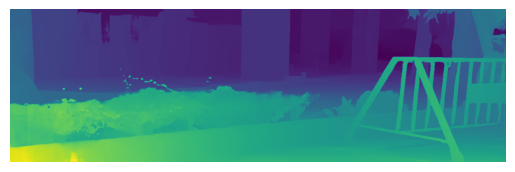

In [23]:
plt.imshow(img)
plt.axis('off')

(-0.5, 1247.5, 383.5, -0.5)

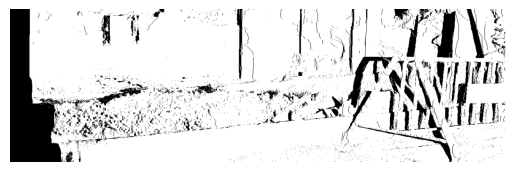

In [24]:
plt.imshow(occ,'gray')
plt.axis('off')

(-0.5, 1247.5, 383.5, -0.5)

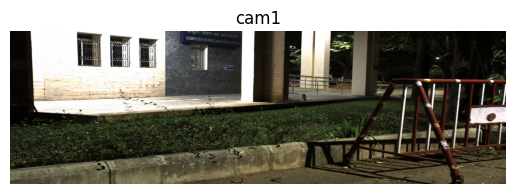

In [25]:
plt.imshow(np.array(img_arr1))
plt.title('cam1')
plt.axis('off')

(-0.5, 1247.5, 383.5, -0.5)

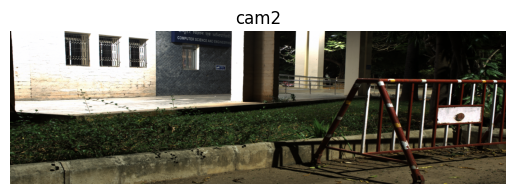

In [26]:
plt.imshow(np.array(img_arr2))
plt.title('cam2')
plt.axis('off')

In [27]:
def image_warp(right, disp):
        return Warp_image(right,-1*disp,wrap_mode='edge')

In [28]:
#warping
img_arr2_w = image_warp(torch.from_numpy(img_arr2).permute(2,0,1).unsqueeze(0), torch.from_numpy(img)).squeeze().permute(1,2,0).numpy()
print(img_arr2_w.shape)

(384, 1248, 3)


In [29]:
img_arr2_w_ = image_warp(torch.from_numpy(img_arr2).permute(2,0,1).unsqueeze(0), torch.from_numpy(img*occ)).squeeze().permute(1,2,0).numpy()

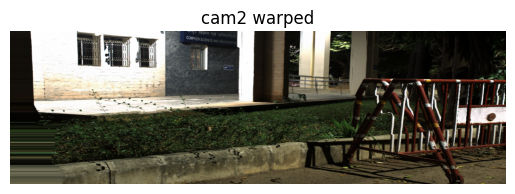

(-0.5, 1247.5, 383.5, -0.5)

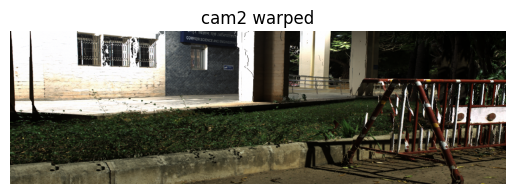

In [30]:
plt.imshow(np.array(img_arr2_w).astype(np.uint8))
plt.title('cam2 warped')
plt.axis('off')
plt.show()
plt.imshow(np.array(img_arr2_w_).astype(np.uint8))
plt.title('cam2 warped')
plt.axis('off')

(-0.5, 1247.5, 383.5, -0.5)

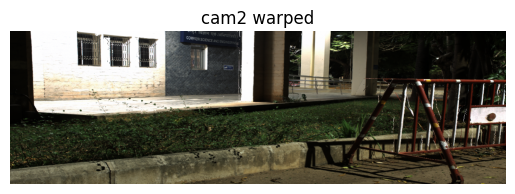

In [31]:
img2_w = img_arr2_w*occ[:,:,None] + img_arr1*(1-occ[:,:,None])
plt.imshow(np.array(img2_w).astype(np.uint8))
plt.title('cam2 warped')
plt.axis('off')

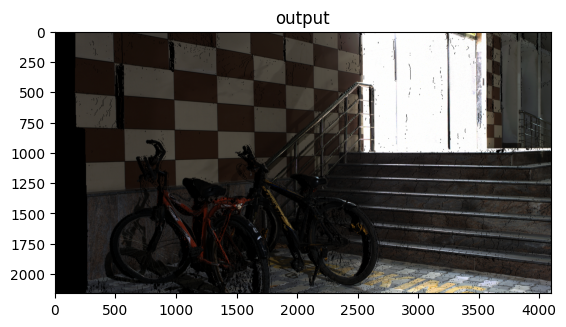

Text(0.5, 1.0, 'input')

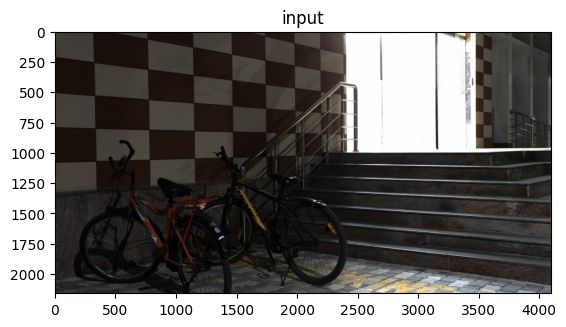

In [48]:
'''
warped = np.array(Image.open('/home/gpu/girish/output.png'))
plt.imshow(warped)
plt.title('output')
plt.show()
plt.imshow(np.array(Image.open('/home/gpu/girish/input.png')))
plt.title('input')

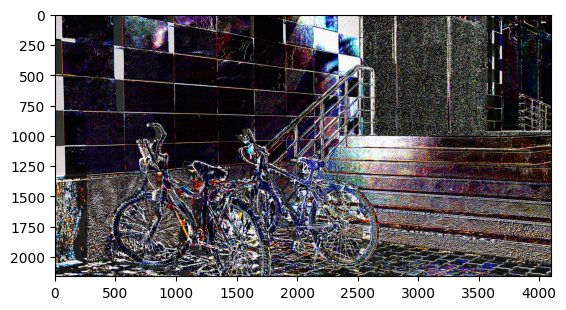

In [41]:
plt.imshow(cv2.resize(np.array(left_img), dsize=(4096,2160))-warped)

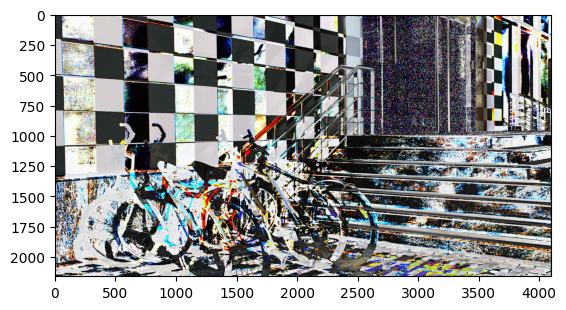

In [18]:
plt.imshow(np.abs(cv2.resize(np.array(Image.open(right_img_path)), dsize=(4096,2160))-cv2.resize(np.array(left_img), dsize=(4096,2160))))

In [12]:
img_arr1 = cv2.resize(img_arr1, dsize=(4096,2160), interpolation=cv2.INTER_LINEAR)
img_arr2 = cv2.resize(img_arr2, dsize=(4096,2160), interpolation=cv2.INTER_LINEAR)

In [10]:
img_arr2_w = image_warp(torch.from_numpy(img_arr2).permute(2,0,1).unsqueeze(0), torch.from_numpy(disp*occ)).squeeze().permute(1,2,0).numpy()

PIL.PngImagePlugin.PngImageFile